<a href="https://colab.research.google.com/github/mparag019/DL-Assignment-1/blob/main/DLAssign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb
import numpy as np
import random
from keras.datasets import fashion_mnist
from keras.datasets import mnist
import matplotlib.pyplot as plt
import sys
import wandb
wandb.login()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train/255
x_test = x_test/255

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

k = 10

### Question 1


In [4]:
def showImage():
    label = []
    images = []

    for i in range(len(x_train)):
        if len(label) == 10:
            break
        if y_train[i] not in label:
            images.append(x_train[i])
            label.append(y_train[i])

    # Initialize a Weights & Biases run
    wandb.init(project="DL-Assignment-1", name="logging_images_example")

    # Log the images
    for i in range(len(images)):
        # Convert the image to a numpy array if it's not already
        image_array = np.array(images[i])

        # Log the image
        wandb.log({"image": [wandb.Image(image_array, caption=class_labels[label[i]])]})

        # Optionally, you can also display the image using matplotlib
        plt.imshow(images[i], cmap='gray')
        plt.title(class_labels[label[i]])
        plt.axis("off")
        plt.show()

    # Finish the run
    wandb.finish()

wandb: Currently logged in as: cs23m047. Use `wandb login --relogin` to force relogin


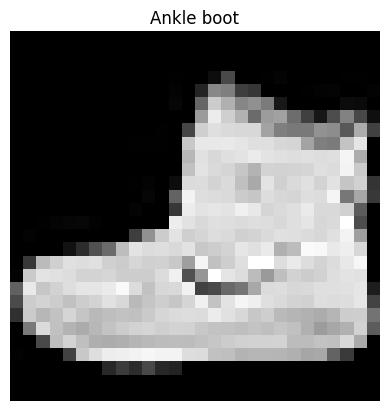

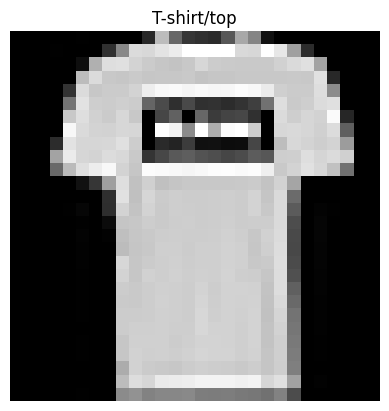

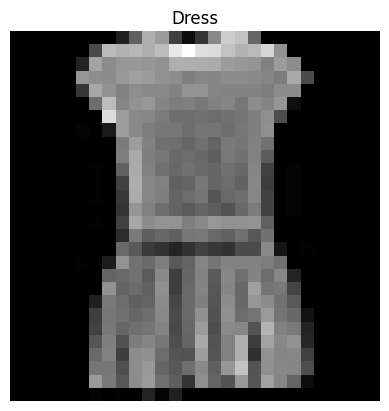

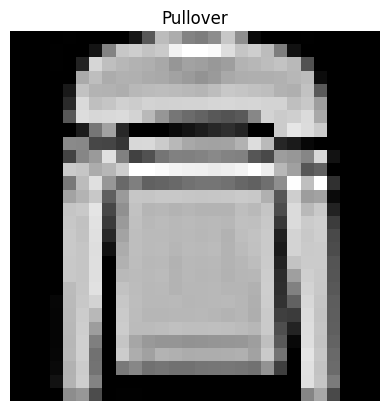

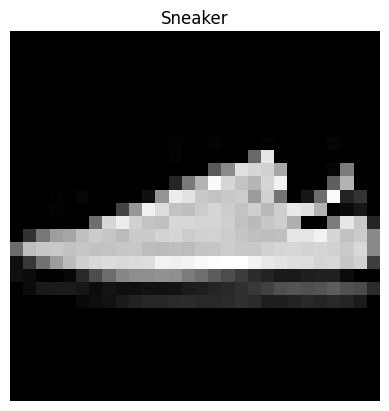

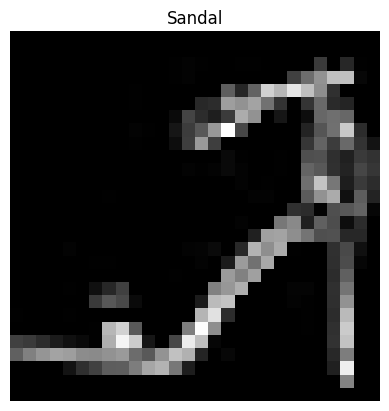

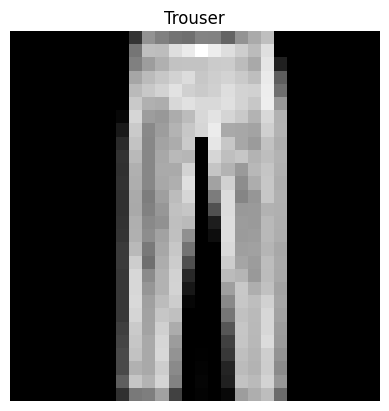

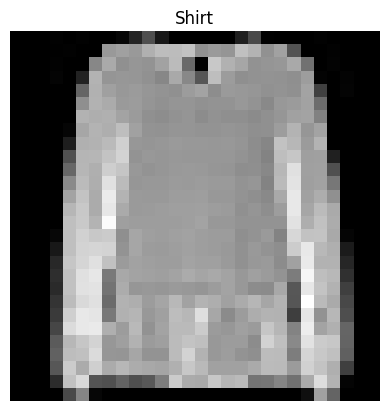

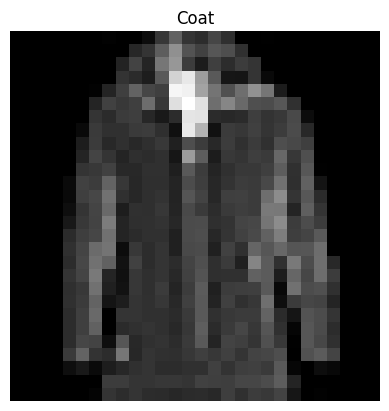

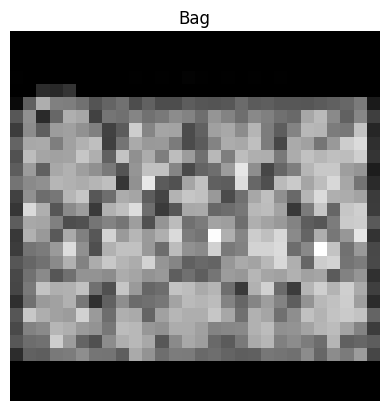

In [5]:
showImage()

#Question 2


In [6]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [7]:
def relu(x):
  if x < 0:
    return 0
  else:
    return x

In [8]:
def tanh(x):
  return np.tanh(x)

In [9]:
def softmax(x):
  max_float_value = sys.float_info.max
  sum = 0.0
  for i in range(len(x)):
    if (sum + np.exp(x[i]) <= max_float_value):
      sum += np.exp(x[i])
    else:
      sum = max_float_value
  y = []
  for i in range(len(x)):
    y_i = np.exp(x[i])/sum
    y.append(y_i)
  return y


In [10]:
def initialize_param(input_size, n, neurons):
  W = []
  b = []
  for i in range(0, n+1):
    if i == 0:
      W_i = np.random.rand(neurons,input_size) * 0.01
      W.append(W_i)
    elif i == n:
      W_i = np.random.rand(10,neurons) * 0.01
      W.append(W_i)
    else :
      W_i = np.random.rand(neurons,neurons) * 0.01
      W.append(W_i)

    if i == n:
      b_i = np.random.rand(10,1) * 0.01
      b.append(b_i)
    else :
      b_i = np.random.rand(neurons,1) * 0.01
      b.append(b_i)
  return W, b

In [11]:
def xavier_initialization(input_size, n, neurons):
  W = []
  b = []
  for i in range(0, n+1):
    if i == 0:
      variance = 6.0 / (input_size + neurons)
      std_dev = np.sqrt(variance)
      W_i = np.random.normal(0, std_dev, size=(neurons, input_size))
      W.append(W_i)
    elif i == n:
      variance = 6.0 / (10 + neurons)
      std_dev = np.sqrt(variance)
      W_i = np.random.normal(0, std_dev, size=(10, neurons))
      W.append(W_i)
    else :
      variance = 6.0 / (neurons + neurons)
      std_dev = np.sqrt(variance)
      W_i = np.random.normal(0, std_dev, size=(neurons, neurons))
      W.append(W_i)

    if i == n:
      variance = 2.0 / (10 + 1)
      std_dev = np.sqrt(variance)
      b_i = np.random.normal(0, std_dev, size=(10, 1))
      # b_i = np.zeros((10,1))
      b.append(b_i)
    else :
      variance = 2.0 / (neurons + 1)
      std_dev = np.sqrt(variance)
      b_i = np.random.normal(0, std_dev, size=(neurons, 1))
      # b_i = np.zeros((neurons,1))
      b.append(b_i)
  return W, b

In [12]:
def forward_propogation(func, x, W, b, n, neurons):
  a = []
  h = []
  for k in range(n+1):
    if k == 0:
      a_k = np.add(np.dot(W[k], x), b[k])
      a.append(a_k)
    else:
      a_k = np.add(np.dot(W[k], h[k-1]), b[k])
      a.append(a_k)
    if k == n: break
    h_k = []
    a[k] = np.clip(a[k], -709.78, 709.78)

    for j in range(neurons):
      if func == "sigmoid":
        h_kj = sigmoid(a[k][j][0])
      elif func == "ReLU":
        h_kj = relu(a[k][j][0])
      elif func == "tanh":
        h_kj = tanh(a[k][j][0])
      h_k.append(h_kj)
    h_k = np.array(h_k).reshape(neurons,1)
    h.append(h_k)
  a[n] = np.clip(a[n], -500, 500)
  y_pred = np.array(softmax(a[n]))
  return a, h, y_pred


In [13]:
# x = x_train[0].flatten().reshape(784,1)
# x_len = len(x)
# # print(x.shape)
# W, b= initialize_param(x_len, 2, 16)
# print(W[0].shape)
# print(W[1].shape)
# print(W[2].shape)
# print(b[0].shape)
# print(b[1].shape)
# print(b[2].shape)

# a, h, y_pred = forward_propogation("ReLU", x, W, b, n)
# # print(a)
# # print(h)
# # print(y_pred)
# # print(y_pred.shape)
# # print(y_train[0])

#Question 3, Question 4

In [14]:
def diff_g(func, a):
  diff_a = []
  if func == "sigmoid":
    for i in a:
      i = np.clip(i, -709.78, 709.78)
      diff_a.append(sigmoid(i[0]) * (1 - sigmoid(i[0])))
  elif func == "tanh":
    for i in a:
      diff_a.append(1 - tanh(i[0]) * tanh(i[0]))
  elif func == "ReLU":
    for i in a:
      if i[0] > 0: diff_a.append(1)
      else :diff_a.append(0)
  diff_a = np.array(diff_a).reshape(len(diff_a),1)
  return diff_a

In [15]:
def back_propogation(func, a, h, y_pred, y, x, n, W, loss_type):
  e_y = np.zeros(10).reshape(10,1)
  e_y[y] = 1

  grad_W = []
  grad_b = []
  grad_h = []
  grad_a = []
  if loss_type == "cross_entropy":
    grad_a_n = np.subtract(y_pred, e_y)
  else :
    grad_a_n = -2 * (y_pred - e_y) * (y_pred * (1 - y_pred))
  grad_a.append(grad_a_n)
  for k in range(n, -1, -1):
    if k == 0:
      grad_W_k = np.dot(grad_a[len(grad_a) - 1], x.T)
    else:
      grad_W_k = np.dot(grad_a[len(grad_a) - 1], h[k-1].T)

    grad_b_k = grad_a[len(grad_a) - 1]
    grad_W.append(grad_W_k)
    grad_b.append(grad_b_k)

    if k == 0: break

    grad_hprev = np.dot(W[k].T, grad_a[len(grad_a) - 1])

    g = diff_g(func, a[k-1])
    grad_aprev = grad_hprev * g

    grad_h.append(grad_hprev)
    grad_a.append(grad_aprev)

  return grad_W, grad_b




In [16]:
# x = x_train[0].flatten().reshape(784,1)
# x_len = len(x)
# y = y_train[0]

# W, b= initialize_param(x_len, n, neurons)

# a, h, y_pred = forward_propogation("ReLU", x, W, b, n)
# grad_W, grad_b = back_propogation("ReLU",  a, h, y_pred, y, x)
# # print(grad_W)
# # print(grad_b)


**Gradient Descent**

In [17]:
def gradient_descent(func, x, y, W, b, n, neurons, loss_type):
  a, h, y_pred = forward_propogation(func, x, W, b, n, neurons)
  grad_W, grad_b = back_propogation(func, a, h, y_pred, y, x, n, W, loss_type)
  return grad_W, grad_b, y_pred


In [18]:
def mean_squared_error(y_pred, y):
  loss = 0
  for i in range(len(y_pred)):
    if (i == y):
      loss += (y_pred[i][0] - 1)**2
    else:
      loss += (y_pred[i][0])**2
  return loss

In [19]:
def cross_entropy_loss(y_pred, y):
  return -np.log(y_pred[y][0])


In [20]:
def training_accuracy(x_train, activation_func, W, b, n, y_train, neurons):
  count = 0
  for i in range(int(0.9 * len(x_train))):
    a, h, y_pred = forward_propogation(activation_func, x_train[i].flatten().reshape(784,1), W, b, n, neurons)
    y_p = np.argmax(y_pred)
    if (y_train[i] == y_p):
      count+=1
  # wandb.log({"Training Acc: " : count/54000})
  print("Training Acc: " , count/54000)

In [21]:
def validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train, neurons, sum):
  count = 0
  loss = 0
  for i in range(54000, len(x_train)):
    a, h, y_pred = forward_propogation(activation_func, x_train[i].flatten().reshape(784,1), W, b, n, neurons)
    y_p = np.argmax(y_pred)
    loss += cross_entropy_loss(y_pred, y_train[i])
    if (y_train[i] == y_p):
      count+=1
  # wandb.log({"Validation loss: " : (loss + sum)/6000})
  # wandb.log({"Validation Acc: ": count/6000})
  print("Validation loss: " , (loss + sum)/6000)
  print("Validation Acc: ", count/6000)

In [22]:
def sgd(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b, loss_type, x_train, y_train):
  batch = batch_size
  for j in range(epochs):
    loss = 0
    for i in range(int(0.9 * len(x_train))):

      if batch == batch_size:
        dw = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(bias) for bias in b]

      grad_W, grad_b, y_pred = gradient_descent(activation_func, x_train[i].flatten().reshape(784,1), y_train[i], W, b, n, neurons, loss_type)

      for k in range(len(dw)):
        dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
      for k in range(len(db)):
        db[k] = np.add(db[k], grad_b[len(db) - k - 1])
      batch-=1

      if batch == 0:
        for k in range(len(dw)):
          W[k] = np.subtract(W[k],(eta * dw[k]/batch_size)) - eta * alpha * W[k]
        for i in range(len(db)):
          b[k] = np.subtract(b[k],(eta * db[k]/batch_size))
        batch = batch_size

      if (loss_type == "cross_entropy"):
        loss += cross_entropy_loss(y_pred, y_train[i])
      else :
        loss += mean_squared_error(y_pred, y_train[i])

    sum_loss = 0
    for i in range(len(W)):
      sum_loss += np.sum(np.square(W[i]))
    sum_loss = sum_loss * alpha / 2

    wandb.log({"Epoch : ": j+1})
    wandb.log({"Training loss: " : (loss + sum_loss) /54000})

    training_accuracy(x_train, activation_func, W, b, n, y_train, neurons)

    validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train, neurons, sum_loss)
  return W,b



**Momentum Gradient Descent**

In [23]:
def momentum(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b, loss_type, x_train, y_train):
  batch = batch_size
  beta = 0.9
  prev_vw = [np.zeros_like(w) for w in W]
  prev_vb = [np.zeros_like(bias) for bias in b]

  for j in range(epochs):
    loss = 0
    for i in range(int(0.9 * len(x_train))):

      if batch == batch_size:
        dw = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(bias) for bias in b]
        vw = [np.zeros_like(w) for w in W]
        vb = [np.zeros_like(bias) for bias in b]
      grad_W, grad_b, y_pred = gradient_descent(activation_func, x_train[i].flatten().reshape(784,1), y_train[i], W, b, n, neurons, loss_type)

      for k in range(len(dw)):
        dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
      for k in range(len(db)):
        db[k] = np.add(db[k], grad_b[len(db) - k - 1])
      batch-=1

      if batch == 0:
        for k in range(len(dw)):
          vw[k] = np.add(vw[k],np.add(beta * prev_vw[k], eta* dw[k]/batch_size))
          W[k] = np.subtract(W[k],vw[k]) - eta * alpha * W[k]
        for k in range(len(db)):
          vb[k] = np.add(vb[k],np.add(beta * prev_vb[k], eta* db[k]/batch_size))
          b[k] = np.subtract(b[k],vb[k])
        prev_vw = vw
        prev_vb = vb
        batch = batch_size
      if (loss_type == "cross_entropy"):
        loss += cross_entropy_loss(y_pred, y_train[i])
      else :
        loss += mean_squared_error(y_pred, y_train[i])

    sum_loss = 0
    for i in range(len(W)):
      sum_loss += np.sum(np.square(W[i]))
    sum_loss = sum_loss * alpha / 2

    wandb.log({"Epoch : ": j+1})
    wandb.log({"Training loss: " : (loss + sum_loss) /54000})

    training_accuracy(x_train, activation_func, W, b, n, y_train, neurons)

    validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train, neurons, sum_loss)
  return W, b



**Nestrov Gradient Descent**

In [24]:
def nestrov(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b, loss_type, x_train, y_train):
  batch = batch_size
  beta = 0.9
  prev_vw = [np.zeros_like(w) for w in W]
  prev_vb = [np.zeros_like(bias) for bias in b]
  vw = [np.zeros_like(w) for w in W]
  vb = [np.zeros_like(bias) for bias in b]

  for j in range(epochs):
    loss = 0
    for i in range(int(0.9 * len(x_train))):
      if batch == batch_size:
        dw = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(bias) for bias in b]
        W_new = [np.zeros_like(w) for w in W]
        b_new = [np.zeros_like(bias) for bias in b]
        for k in range(len(dw)):
          vw[k] = beta * prev_vw[k]
        for k in range(len(db)):
          vb[k] = beta * prev_vb[k]
        for k in range(len(dw)):
          W_new[k] = np.subtract(W[k],vw[k])
        for k in range(len(db)):
          b_new[k] = np.subtract(b[k],vb[k])

      grad_W, grad_b, y_pred = gradient_descent(activation_func, x_train[i].flatten().reshape(784,1), y_train[i], W_new, b_new, n, neurons, loss_type)

      for k in range(len(dw)):
        dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
      for k in range(len(db)):
        db[k] = np.add(db[k], grad_b[len(db) - k - 1])
      batch-=1

      if batch == 0:
        for k in range(len(dw)):
          vw[k] = np.add(vw[k],eta* dw[k]/batch_size)
          W[k] = np.subtract(W[k],vw[k]) - eta * alpha * W[k]
        for k in range(len(db)):
          vb[k] = np.add(vb[k],eta*db[k]/batch_size)
          b[k] = np.subtract(b[k],vb[k])
        prev_vw = vw
        prev_vb = vb
        batch = batch_size
      if (loss_type == "cross_entropy"):
        loss += cross_entropy_loss(y_pred, y_train[i])
      else :
        loss += mean_squared_error(y_pred, y_train[i])

    sum_loss = 0
    for i in range(len(W)):
      sum_loss += np.sum(np.square(W[i]))
    sum_loss = sum_loss * alpha / 2

    wandb.log({"Epoch : ": j+1})
    wandb.log({"Training loss: " : (loss + sum_loss) /54000})

    training_accuracy(x_train, activation_func, W, b, n, y_train, neurons)

    validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train, neurons, sum_loss)
  return W, b




**RMS Prop Gradient Descent**

In [25]:
def rmsprop(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b, loss_type, x_train, y_train):
  batch = batch_size
  eps = 1e-10
  beta = 0.9
  vw = [np.zeros_like(w) for w in W]
  vb = [np.zeros_like(bias) for bias in b]

  for j in range(epochs):
    loss = 0
    for i in range(int(0.9 * len(x_train))):
      if batch == batch_size:
        dw = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(bias) for bias in b]

      grad_W, grad_b, y_pred = gradient_descent(activation_func, x_train[i].flatten().reshape(784,1), y_train[i], W, b, n, neurons, loss_type)

      for k in range(len(dw)):
        dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
      for k in range(len(db)):
        db[k] = np.add(db[k], grad_b[len(db) - k - 1])
      batch-=1

      if batch == 0:
        for k in range(len(dw)):
          vw[k] = np.add(beta * vw[k],(1 - beta)* (dw[k]/batch_size)**2)
          W[k] = np.subtract(W[k],eta * (dw[k]/batch_size) / (np.sqrt(vw[k]) + eps)) - eta * alpha * W[k]
        for k in range(len(db)):
          vb[k] = np.add(beta * vb[k],(1 - beta)*(db[k]/batch_size)**2)
          b[k] = np.subtract(b[k],eta * (db[k]/batch_size) / (np.sqrt(vb[k]) + eps))
        batch = batch_size
      if (loss_type == "cross_entropy"):
        loss += cross_entropy_loss(y_pred, y_train[i])
      else :
        loss += mean_squared_error(y_pred, y_train[i])

    sum_loss = 0
    for i in range(len(W)):
      sum_loss += np.sum(np.square(W[i]))
    sum_loss = sum_loss * alpha / 2

    wandb.log({"Epoch : ": j+1})
    wandb.log({"Training loss: " : (loss + sum_loss) /54000})

    training_accuracy(x_train, activation_func, W, b, n, y_train, neurons)

    validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train, neurons, sum_loss)
  return W, b



**Adam Gradient Descent**

In [26]:
def adam(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b, loss_type, x_train, y_train):
  batch = batch_size

  eps = 1e-10
  beta1 = 0.9
  beta2 = 0.999

  mw = [np.zeros_like(w) for w in W]
  mb = [np.zeros_like(bias) for bias in b]
  mw_hat = [np.zeros_like(w) for w in W]
  mb_hat = [np.zeros_like(bias) for bias in b]
  vw = [np.zeros_like(w) for w in W]
  vb = [np.zeros_like(bias) for bias in b]
  vw_hat = [np.zeros_like(w) for w in W]
  vb_hat = [np.zeros_like(bias) for bias in b]

  t = 0
  for j in range(epochs):
    loss = 0
    for i in range(int(0.9 * len(x_train))):
      if batch == batch_size:
        dw = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(bias) for bias in b]

      grad_W, grad_b, y_pred = gradient_descent(activation_func, x_train[i].flatten().reshape(784,1), y_train[i], W, b, n, neurons, loss_type)

      for k in range(len(dw)):
        dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
      for k in range(len(db)):
        db[k] = np.add(db[k], grad_b[len(db) - k - 1])
      batch-=1

      if batch == 0:
        for k in range(len(dw)):
          mw[k] = np.add(beta1 * mw[k], (1 - beta1) * (dw[k]/batch_size))
          vw[k] = np.add(beta2 * vw[k], (1 - beta2) * (dw[k]/batch_size)**2)
        for k in range(len(db)):
          mb[k] = np.add(beta1 * mb[k], (1 - beta1) * (db[k]/batch_size))
          vb[k] = np.add(beta2 * vb[k], (1 - beta2) * (db[k]/batch_size)**2)

        for k in range(len(dw)):
          mw_hat[k] = mw[k]/(1 - np.power(beta1, t+1))
          vw_hat[k] = vw[k]/(1 - np.power(beta2, t+1))
        for k in range(len(db)):
          mb_hat[k] = mb[k]/(1 - np.power(beta1, t+1))
          vb_hat[k] = vb[k]/(1 - np.power(beta2, t+1))

        for k in range(len(dw)):
          W[k] = np.subtract(W[k],eta * mw_hat[k] / (np.sqrt(vw_hat[k]) + eps)) - eta * alpha * W[k]
        for k in range(len(db)):
          b[k] = np.subtract(b[k],eta * mb_hat[k] / (np.sqrt(vb_hat[k]) + eps))
        batch = batch_size
        t+=1
      if (loss_type == "cross_entropy"):
        loss += cross_entropy_loss(y_pred, y_train[i])
      else :
        loss += mean_squared_error(y_pred, y_train[i])

    sum_loss = 0
    for i in range(len(W)):
      sum_loss += np.sum(np.square(W[i]))
    sum_loss = sum_loss * alpha / 2

    # wandb.log({"Epoch : ": j+1})
    # wandb.log({"Training loss: " : (loss + sum_loss) /54000})

    print("Epoch", j+1)
    print("Training loss: ", (loss+sum_loss)/ 54000)

    training_accuracy(x_train, activation_func, W, b, n, y_train, neurons)

    validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train, neurons, sum_loss)
  return W, b




**NAdam Gradient Descent**

In [27]:
def nadam(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b, loss_type, x_train, y_train):

  batch = batch_size

  eps = 1e-10
  beta1 = 0.9
  beta2 = 0.999

  mw = [np.zeros_like(w) for w in W]
  mb = [np.zeros_like(bias) for bias in b]
  mw_hat = [np.zeros_like(w) for w in W]
  mb_hat = [np.zeros_like(bias) for bias in b]
  vw = [np.zeros_like(w) for w in W]
  vb = [np.zeros_like(bias) for bias in b]
  vw_hat = [np.zeros_like(w) for w in W]
  vb_hat = [np.zeros_like(bias) for bias in b]

  t = 1
  for j in range(epochs):
    loss = 0
    for i in range(int(0.9 * len(x_train))):
      if batch == batch_size:
        dw = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(bias) for bias in b]

      grad_W, grad_b, y_pred = gradient_descent(activation_func, x_train[i].flatten().reshape(784,1), y_train[i], W, b, n, neurons, loss_type)

      for k in range(len(dw)):
        dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
      for k in range(len(db)):
        db[k] = np.add(db[k], grad_b[len(db) - k - 1])
      batch-=1

      if batch == 0:
        for k in range(len(dw)):
          mw[k] = np.add(beta1 * mw[k], (1 - beta1) * (dw[k]/batch_size))
          vw[k] = np.add(beta2 * vw[k], (1 - beta2) * (dw[k]/batch_size)**2)
        for k in range(len(db)):
          mb[k] = np.add(beta1 * mb[k], (1 - beta1) * (db[k]/batch_size))
          vb[k] = np.add(beta2 * vb[k], (1 - beta2) * (db[k]/batch_size)**2)

        for k in range(len(dw)):
          mw_hat[k] = mw[k]/(1 - np.power(beta1, j+1))
          vw_hat[k] = vw[k]/(1 - np.power(beta2, j+1))
        for k in range(len(db)):
          mb_hat[k] = mb[k]/(1 - np.power(beta1, j+1))
          vb_hat[k] = vb[k]/(1 - np.power(beta2, j+1))

        for k in range(len(dw)):
          W[k] = np.subtract(W[k],(eta / (np.sqrt(vw_hat[k]) + eps)) * np.add((beta1 * mw_hat[k]), (1 - beta1) * (dw[k] / batch_size) / (1-beta1**(t + 1)))) - eta * alpha * W[k]
        for k in range(len(db)):
          b[k] = np.subtract(b[k],(eta / (np.sqrt(vb_hat[k]) + eps)) * np.add((beta1 * mb_hat[k]), (1 - beta1) * (db[k] / batch_size) / (1-beta1**(t + 1))) )
        batch = batch_size
        t+=1
      if (loss_type == "cross_entropy"):
        loss += cross_entropy_loss(y_pred, y_train[i])
      else :
        loss += mean_squared_error(y_pred, y_train[i])

    sum_loss = 0
    for i in range(len(W)):
      sum_loss += np.sum(np.square(W[i]))
    sum_loss = sum_loss * alpha / 2

    # wandb.log({"Epoch : ": j+1})
    # wandb.log({"Training loss: " : (loss + sum_loss) /54000})

    print("Epoch", j+1)
    print("Training loss: ", (loss+sum_loss)/ 54000)

    training_accuracy(x_train, activation_func, W, b, n, y_train, neurons)

    validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train, neurons, sum_loss)
  return W, b



In [28]:
# n = int(input("Enter number of hidden layers: "))
# neurons = int(input("Enter number of neurons in hidden layer: "))
# epochs = int(input("Enter number of epochs: "))
# alpha = float(input("Enter weight decay: "))
# eta = float(input("Enter learning rate: "))
# batch_size = int(input("Enter batch size: "))
# initialization = input("Enter initialization method: ")
# activation_func = input("Enter activation function: ")

In [29]:
# optimizer = input("Enter optimizer: ")

In [30]:

# if initialization == "Xavier":
#   W, b= xavier_initialization(len(x_train[0].flatten()), n, neurons)
# elif initialization == "random":
#   W, b= initialize_param(len(x_train[0].flatten()), n, neurons)

# if (optimizer == "sgd"):
#   sgd(n, neurons, epochs, alpha, eta, 1, activation_func, W, b)
# elif (optimizer == "momentum"):
#   momentum(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b)
# elif(optimizer == "nestrov"):
#   nestrov(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b)
# elif (optimizer == "rmsprop"):
#   rmsprop(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b)
# elif (optimizer == "adam"):
#   adam(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b)
# elif (optimizer == "nadam"):
#   nadam(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b)



In [31]:
!pip install wandb


In [32]:
import wandb
wandb.login()

True

In [33]:
sweep_config = {
    'method': 'bayes',  # or 'grid', 'bayes', etc. for different search methods
    'metric': {
        'name': 'Validation Acc: ',  # Change 'accuracy' to the name of your metric
        'goal': 'maximize'   # or 'minimize' if it's a loss metric
    },
    'parameters': {
        'num_epochs': {
            'values': [5, 10]
        },
        'num_hidden_layers': {
            'values': [3, 4, 5]
        },
        'hidden_layer_size': {
            'values': [32, 64, 128]
        },
        'weight_decay': {
            'values': [0, 0.0005, 0.5]
        },
        'learning_rate': {
            'values': [1e-3, 1e-4]
        },
        'optimizer': {
            'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']
        },
        'batch_size': {
            'values': [16, 32, 64]
        },
        'weight_initialization': {
            'values': ['random', 'Xavier']
        },
        'activation_function': {
            'values': ['sigmoid', 'tanh', 'ReLU']
        },
        'loss_type': {
            'values': ['mean_squared_error', 'cross_entropy']
        }
    }
}

In [34]:
sweep_id = wandb.sweep(sweep_config, project='DL-Assignment-1')

In [35]:
def train():
    with wandb.init() as run:
        config=wandb.config

        # n = config['num_hidden_layers']
        # neurons = config['hidden_layer_size']
        # epochs = config['num_epochs']
        # alpha = config['weight_decay']
        # eta = config['learning_rate']
        # batch_size = config['batch_size']
        # activation_func = config['activation_function']
        # init = config['weight_initialization']
        # optimizer = config['optimizer']
        # loss_type = config['loss_type']

        ########## First best hyperparameter configuration #############
        # n = 3
        # neurons = 128
        # epochs = 10
        # alpha = 0.0005
        # eta = 0.001
        # batch_size = 16
        # activation_func = "ReLU"
        # init = "Xavier"
        # optimizer = "nadam"
        # loss_type = "cross_entropy"
        # dataset = "mnist"

        ########## Second best hyperparameter configuration #############
        # n = 5
        # neurons = 64
        # epochs = 10
        # alpha = 0.0005
        # eta = 0.001
        # batch_size = 64
        # activation_func = "tanh"
        # init = "Xavier"
        # optimizer = "adam"
        # loss_type = "cross_entropy"
        # dataset = "mnist"


        ########## Third best hyperparameter configuration #############
        # n = 4
        # neurons = 128
        # epochs = 10
        # alpha = 0.0005
        # eta = 0.001
        # batch_size = 64
        # activation_func = "ReLU"
        # init = "Xavier"
        # optimizer = "adam"
        # loss_type = "cross_entropy"
        # dataset = "mnist"


        ####### If we want to run mnist data
        # run_name="hl_"+ str(n) + "_bs_" + str(batch_size) + "_ac_" + str(activation_func)+"mnist"
        # wandb.run.name=run_name

        # if dataset == "fashion_mnist":
        #   (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
        #   x_train = x_train/255
        #   x_test = x_test/255
        # elif dataset == "mnist":
        #   (x_train, y_train), (x_test, y_test) = mnist.load_data()
        #   x_train = x_train/255
        #   x_test = x_test/255

        (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
        x_train = x_train/255
        x_test = x_test/255

        print(n, neurons, epochs, alpha, eta, batch_size, activation_func, optimizer)


        if init == "Xavier":
            W, b= xavier_initialization(len(x_train[0].flatten()), n, neurons)
        elif init == "random":
            W, b= initialize_param(len(x_train[0].flatten()), n, neurons)

        if (optimizer == "sgd"):
            W,b = sgd(n, neurons, epochs, alpha, eta, 1, activation_func, W, b, loss_type, x_train, y_train)
        elif (optimizer  == "momentum"):
            W,b = momentum(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b, loss_type, x_train, y_train)
        elif(optimizer  == "nesterov"):
            W,b = nestrov(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b,loss_type, x_train, y_train)
        elif (optimizer  == "rmsprop"):
            W,b = rmsprop(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b,loss_type, x_train, y_train)
        elif (optimizer  == "adam"):
            W,b = adam(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b,loss_type, x_train, y_train)
        elif (optimizer  == "nadam"):
            W,b = nadam(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b,loss_type, x_train, y_train)


In [36]:
def run_sweep():
    # Run the sweep
    wandb.agent(sweep_id, function=train,count=1)
    wandb.finish()

In [37]:
run_sweep()

#Confusion Matrix


In [38]:
n = 3
neurons = 128
epochs = 10
alpha = 0.0005
eta = 0.001
batch_size = 16
activation_func = "ReLU"
init = "Xavier"
optimizer = "nadam"
loss_type = "cross_entropy"

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train/255
x_test = x_test/255

if init == "Xavier":
  W, b= xavier_initialization(len(x_train[0].flatten()), n, neurons)
elif init == "random":
  W, b= initialize_param(len(x_train[0].flatten()), n, neurons)

if (optimizer == "sgd"):
  W, b=sgd(n, neurons, epochs, alpha, eta, 1, activation_func, W, b, loss_type)
elif (optimizer  == "momentum"):
  W, b=momentum(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b, loss_type)
elif(optimizer  == "nesterov"):
  W, b=nestrov(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b, loss_type)
elif (optimizer  == "rmsprop"):
  W, b=rmsprop(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b, loss_type)
elif (optimizer  == "adam"):
  W, b=adam(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b, loss_type)
elif (optimizer  == "nadam"):
  W, b=nadam(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b, loss_type)






Epoch 1
Training loss:  0.4790019712615897
Training Acc:  0.8624814814814815
Validation loss:  0.4066107678761
Validation Acc:  0.8466666666666667
Epoch 2
Training loss:  0.3551842929545123
Training Acc:  0.8785555555555555
Validation loss:  0.37011999483577174
Validation Acc:  0.8556666666666667
Epoch 3
Training loss:  0.3178411151889069
Training Acc:  0.8909814814814815
Validation loss:  0.34712604050889256
Validation Acc:  0.8688333333333333
Epoch 4
Training loss:  0.2928688413733894
Training Acc:  0.8975
Validation loss:  0.33605516130045243
Validation Acc:  0.873
Epoch 5
Training loss:  0.27441650992467687
Training Acc:  0.9034629629629629
Validation loss:  0.32883637541113553
Validation Acc:  0.8776666666666667
Epoch 6
Training loss:  0.2589692551093474
Training Acc:  0.9086111111111111
Validation loss:  0.3255178583829013
Validation Acc:  0.8773333333333333
Epoch 7
Training loss:  0.2458192376998853
Training Acc:  0.9118148148148149
Validation loss:  0.32435288051348043
Validati

In [39]:
y_predicted = []
for x in x_test:
  a, h, y_pred = forward_propogation(activation_func, x.reshape(x.shape[0]*x.shape[1], 1), W, b, n, neurons)
  y = np.argmax(y_pred)
  y_predicted.append(y)



In [40]:
# print(len(y_predicted))
# print(y_test.shape)
# y_test = list(y_test)
# print(len(y_test))

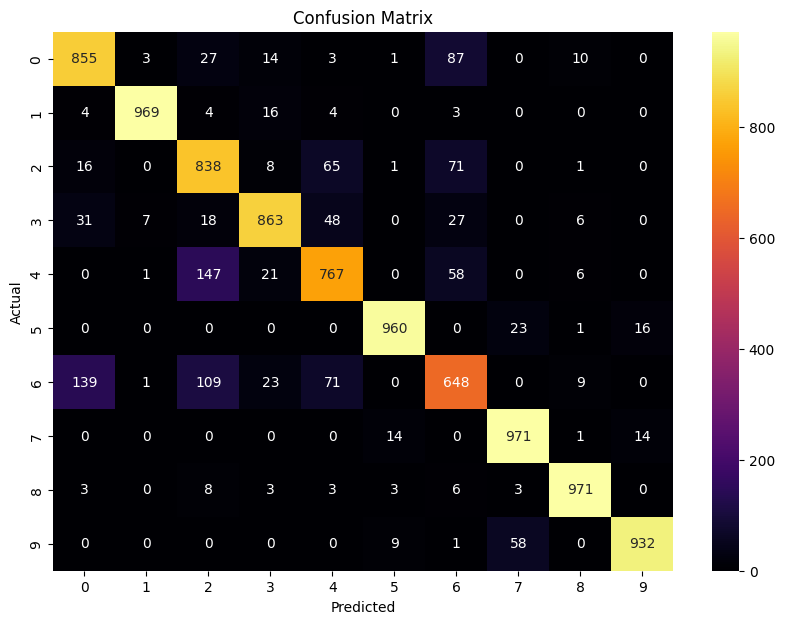

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels):
    # Create confusion matrix

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="inferno", xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig("Confusion_Matrix.jpeg")
    wandb.log({"Confusion_Matrix": wandb.Image("Confusion_Matrix.jpeg")})

    plt.show()

# Determine unique labels
labels = sorted(set(y_test))

wandb.init(project="DL-Assignment-1", name="confusion_matrix")
# Plot confusion matrix
plot_confusion_matrix(y_test, y_predicted, labels)

# Finish the run
wandb.finish()
